In [1]:
import jpype

jpype.startJVM(jpype.getDefaultJVMPath())

In [2]:
import pickle as pkl
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import rfft, rfftfreq

In [3]:
DIR = '../results/2022-11-22T11:28:50'
files = os.listdir(DIR)

scope0_files = [f for f in files if f.startswith('scope_0') and f.endswith('.pkl')][1:]
scope1_files = [f for f in files if f.startswith('scope_1') and f.endswith('.pkl')][1:]
cal1000_files = [f for f in files if f.startswith('BXSCAL_1000_signal') and f.endswith('.pkl')][1:]
cal1100_files = [f for f in files if f.startswith('BXSCAL_1100_signal') and f.endswith('.pkl')][1:]
int1000_files = [f for f in files if f.startswith('BXSCINT_1000') and f.endswith('.pkl')][1:]
int1001_files = [f for f in files if f.startswith('BXSCINT_1001') and f.endswith('.pkl')][1:]
qmeter_files = [f for f in files if f.startswith('qmeter_') and f.endswith('.pkl')][1:]
blm_files = [f for f in files if f.startswith('blm_') and f.endswith('.pkl')][1:]

scope0_files.sort(key=lambda x: x.split('T')[1])
scope1_files.sort(key=lambda x: x.split('T')[1])
cal1000_files.sort(key=lambda x: x.split('T')[1])
cal1100_files.sort(key=lambda x: x.split('T')[1])
int1000_files.sort(key=lambda x: x.split('T')[1])
int1001_files.sort(key=lambda x: x.split('T')[1])
qmeter_files.sort(key=lambda x: x.split('T')[1])
blm_files.sort(key=lambda x: x.split('T')[1])

initial = pkl.load(open(f"{DIR}/initial.pkl", 'rb'))

scope0 = [pkl.load(open(f"{DIR}/{f}", 'rb')) for f in scope0_files]
scope1 = [pkl.load(open(f"{DIR}/{f}", 'rb')) for f in scope1_files]
cal1000 = [pkl.load(open(f"{DIR}/{f}", 'rb')) for f in cal1000_files]
cal1100 = [pkl.load(open(f"{DIR}/{f}", 'rb')) for f in cal1100_files]
int1000 = [pkl.load(open(f"{DIR}/{f}", 'rb')) for f in int1000_files]
int1001 = [pkl.load(open(f"{DIR}/{f}", 'rb')) for f in int1001_files]
qmeter = [pkl.load(open(f"{DIR}/{f}", 'rb')) for f in qmeter_files]
blm = [pkl.load(open(f"{DIR}/{f}", 'rb')) for f in blm_files]

fig, ax = plt.subplots(len(cal1000), 1, figsize=(7, 10), sharex=True)

for i, (param, d2) in enumerate(list(zip(initial['param_space'], cal1100))):
    interval = param/1000
    time = np.array(d2['timeArray'][1400:1400+5000]) * 1e-6 
    timeRebase = time - time[0]
    data = np.array(d2['countArray'])
    df = rfft(data)
    xf = rfftfreq(len(data), timeRebase[-1]/len(timeRebase))
    #xf = rfftfreq(len(data))
    ax[i].plot(xf, np.abs(df))
    ax[i].set_xlabel("Hz")
    ax[i].set_xlim(1, 1500)
    ax[i].set_ylim(-300, 1000)
    ax[i].vlines(1/interval, -300, 0, color='red')



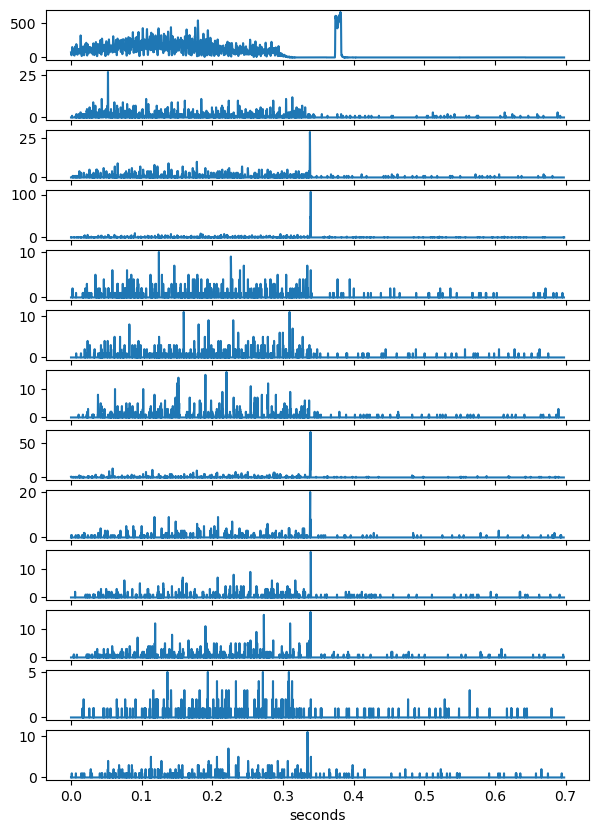

In [6]:
fig, ax = plt.subplots(len(cal1000), 1, figsize=(7, 10), sharex=True)

for i, (d1, d2) in enumerate(list(zip(cal1000, cal1100))):
    time = np.array(d2['timeArray'][1400:1400+5000]) * 1e-6
    timeRebase = time - time[0]
    data = d2['countArray']
    ax[i].plot(timeRebase, data)
    ax[i].set_xlabel("seconds")

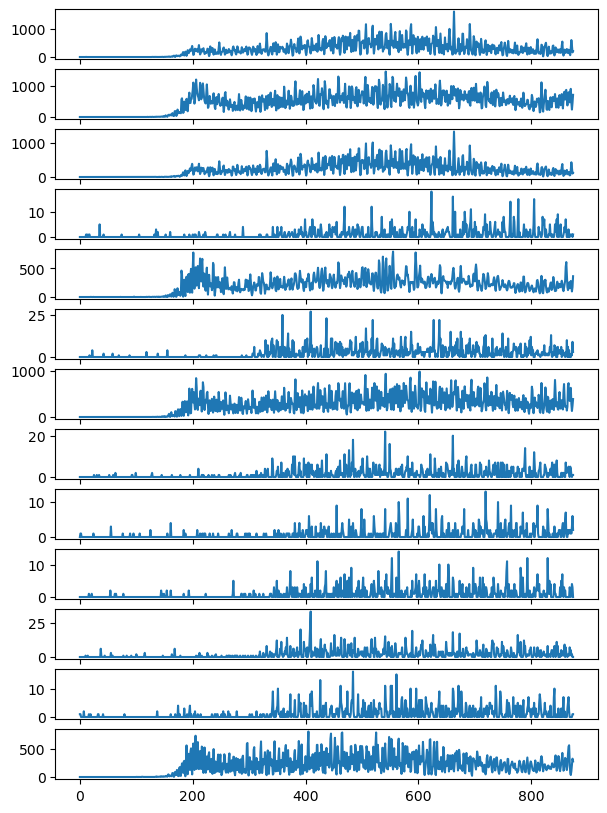

In [93]:


fig, ax = plt.subplots(len(int1001), 1, figsize=(7, 10))

for i, (d1, d2) in enumerate(list(zip(int1000, int1001))):
    d = np.array(d1['countArray'])+np.array(d2['countArray'])
    ax[i].plot(d[:875])
    df = rfft(d)
    xf = rfftfreq(len(d))
    #ax[i].plot(xf, np.abs(df))
